## Exploratory Data Analysis on IPL Data

In [2]:
%%HTML
<img src = "https://miro.medium.com/max/1041/1*DxaQ3_jge0MTrXAkOLnrHQ.png">

To enhance the capabilities of players, to decide on team composition and strategies, franchises may need concrete and precise analysis over the past plays & performance stats of the player and the team.
Getting a deeper understanding of the data is not possible using traditional methods.


For this analysis, we will be doing analysis of **Royal Challengers Bangalore** and **M. Chiinaswamy Stadium** as the home ground.

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

### Importing the Datasets


In [5]:
matches = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv")
deliveries = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv")


### Data Preprocessing

In [7]:
matches.shape

(696, 18)

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

In [13]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [10]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


Since the date, umpire columns do not provide any insights for us, we will drop the columns

In [12]:
matches.drop(['date','umpire1','umpire2','umpire3'] , axis = 1 , inplace = True) 

In [14]:
# set the index as the match_id
matches.set_index('id',inplace = True)

In [16]:
deliveries.shape

(164750, 21)

In [17]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

In [18]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [20]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
deliveries.set_index('match_id' , inplace = True)

## Data Cleaning

Replacing the Full names with short names for ease of access


In [23]:
#Replacing the Full names by short names
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [24]:
#Replacing the Full names by short names
deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

merge seasons column in deliveries dataset which will be helpful in further analysis for each season

In [33]:
deliveries_seasons = deliveries.merge(matches["season"] , left_on=deliveries.index , right_on=matches.index)
#left_index = Column or index level names to join on in the left DataFrame. 
#Can also be an array or list of arrays of the length of the left DataFrame. These arrays are treated as if they are columns.



## Exploratory Data Analysis

Exploratory Data Analysis(EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.


**Q1. How many seasons do we have in the dataset?**

In [36]:
matches['season'].nunique()


11

In [37]:
matches['season'].unique()


array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018],
      dtype=int64)

**Q2. How many matches were played in each season?**

In [40]:
season = matches['season'].value_counts().to_frame()

In [41]:
season

,season
2013,76
2012,74
2011,73
2018,60
2016,60
2014,60
2010,60
2017,59
2015,59
2008,58


#### Plotting a graph

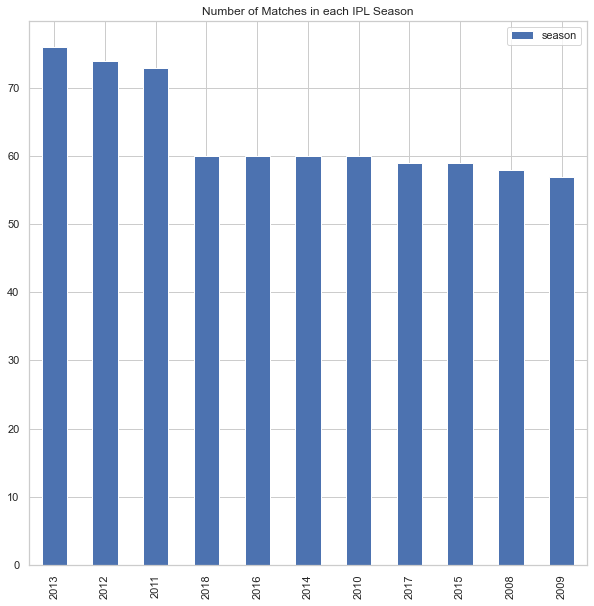

In [45]:
season.plot(kind = "bar",title = "Number of Matches in each IPL Season",figsize = (10,10))

### How many matches were played at each venue?

In [46]:
no_of_matches = matches['venue'].value_counts().to_frame()

In [47]:
no_of_matches

,venue
M Chinnaswamy Stadium,73
Eden Gardens,70
Feroz Shah Kotla,67
Wankhede Stadium,66
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,40
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Subrata Roy Sahara Stadium,17


**Q. Overview of matches played, toss won, wins, and losses for each team in the IPL history.**


In [48]:
matches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,
1,2017,Hyderabad,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium


In [51]:
overall_team_stats = pd.DataFrame(
{'Total Matches Played': matches["team1"].value_counts() + matches["team2"].value_counts(), 
'Toss Won': matches['toss_winner'].value_counts() , 'Total Won': matches["winner"].value_counts(), 
"Total Lost": ((matches["team1"].value_counts() + matches["team2"].value_counts()) - matches["winner"].value_counts())})

overall_team_stats.sort_values(by="Total Won", ascending=False)


,Total Matches Played,Toss Won,Total Won,Total Lost
MI,171,90,98,73
CSK,147,77,90,57
KKR,164,87,86,78
RCB,166,77,79,87
KXIP,162,75,76,86
RR,133,69,70,63
DD,161,80,67,94
SRH,93,42,52,41
DC,75,43,29,46
RPS,30,13,15,15


**Q. How many times has Bangalore won the toss?**

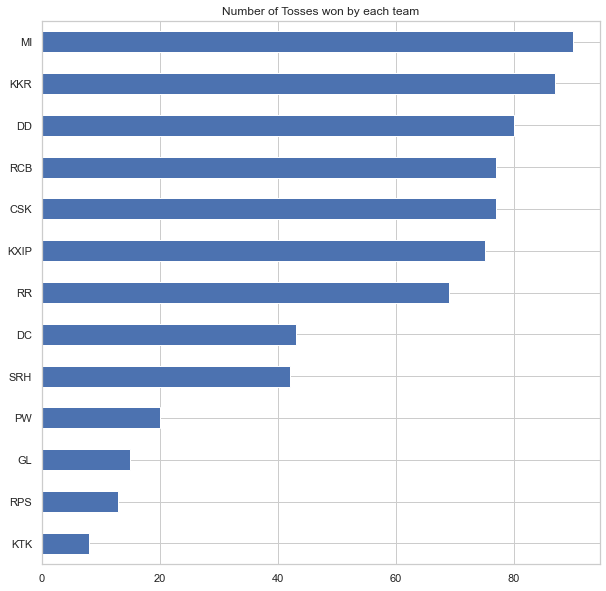

In [53]:
overall_team_stats['Toss Won'].sort_values().plot(kind = "barh",title = "Number of Tosses won by each team",figsize = (10,10))

**Q. Who were the season winners?**

In [54]:
matches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,
1,2017,Hyderabad,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium


In [55]:
season_winner = matches.drop_duplicates(subset = ['season'],keep = 'last')[['season','winner']]

In [57]:
season_winner.sort_values(by = 'season').reset_index()

,id,season,winner
0,117,2008,RR
1,174,2009,DC
2,234,2010,CSK
3,307,2011,CSK
4,381,2012,KKR
5,457,2013,MI
6,517,2014,KKR
7,576,2015,MI
8,636,2016,SRH
9,59,2017,MI


**Q. What is the Win and Loss ratio of each Team?**

In [59]:
overall_team_stats['Win Ratio'] = overall_team_stats['Total Won'] * 100 / overall_team_stats['Total Matches Played']
overall_team_stats['Loss Ratio'] = overall_team_stats['Total Lost'] * 100 / overall_team_stats['Total Matches Played']


In [61]:
overall_team_stats.round(2)

,Total Matches Played,Toss Won,Total Won,Total Lost,Win Ratio,Loss Ratio
CSK,147,77,90,57,61.22,38.78
DC,75,43,29,46,38.67,61.33
DD,161,80,67,94,41.61,58.39
GL,30,15,13,17,43.33,56.67
KKR,164,87,86,78,52.44,47.56
KTK,14,8,6,8,42.86,57.14
KXIP,162,75,76,86,46.91,53.09
MI,171,90,98,73,57.31,42.69
PW,46,20,12,34,26.09,73.91
RCB,166,77,79,87,47.59,52.41


**Q. Has winning the toss helped in winning the matches?**

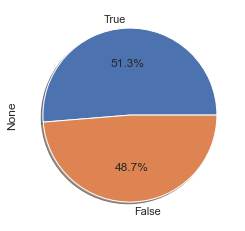

In [68]:
wins = matches['toss_winner'] == matches['winner']
wins.value_counts().plot(kind='pie',autopct = '%1.1f%%',shadow = True)

## Awards in IPL

**Q. Who has the most player of the match awards?**

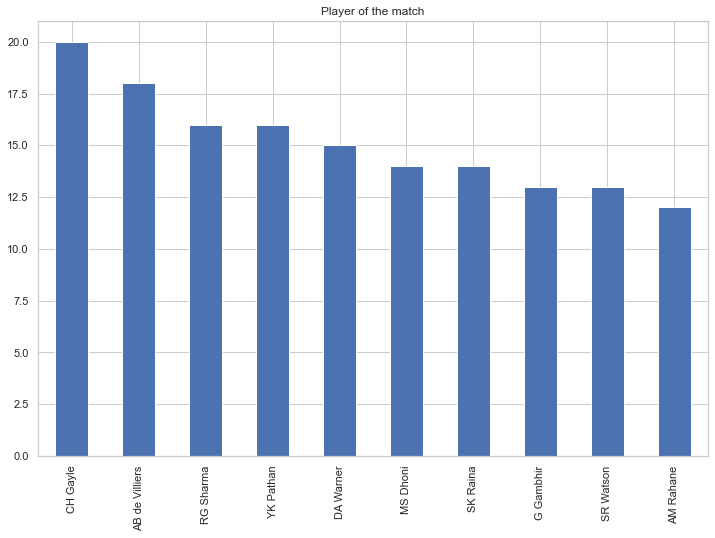

In [70]:
top_players = matches['player_of_match'].value_counts().head(10)
top_players.plot(kind='bar', title='Player of the match', figsize=(12,8))


### Q. Orange Cap winner for each season - presented to the player with most runs

In [81]:
orange_cap_players = deliveries_seasons.groupby(['season']).apply(lambda x: (
 x.groupby(['batsman']).sum()
 .sort_values('batsman_runs', ascending=False)).head(1))

orange_cap_players['batsman_runs'].to_frame()


,,batsman_runs
season,batsman,
2008,SE Marsh,616
2009,ML Hayden,572
2010,SR Tendulkar,618
2011,CH Gayle,608
2012,CH Gayle,733
2013,MEK Hussey,733
2014,RV Uthappa,660
2015,DA Warner,562
2016,V Kohli,973


### Q. Purple Cap winner for each season - presented to the player with most wickets

In [83]:
purple_cap_winners = deliveries_seasons[deliveries_seasons['player_dismissed'].notnull()].groupby(['season']).apply(lambda x: (
 x.groupby(['bowler']).count()
 .sort_values('player_dismissed', ascending=False)).head(1))
orange_cap_players['player_dismissed'].to_frame()


,,player_dismissed
season,bowler,
2008,Sohail Tanvir,24
2009,RP Singh,26
2010,PP Ojha,22
2011,SL Malinga,30
2012,M Morkel,30
2013,DJ Bravo,34
2014,MM Sharma,26
2015,DJ Bravo,28
2016,B Kumar,24


### Q. Who is the Most Valuable Player for RCB?

In [85]:
# Filter matches in which rcb has played
rcb_matches = matches[(matches['team1'] == "RCB") | (matches['team2'] == "RCB")]

In [86]:
rcb_matches[rcb_matches['winner'] == 'RCB']['player_of_match'].value_counts().head(1)


CH Gayle    17
Name: player_of_match, dtype: int64